In [2]:
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

2023-06-06 10:47:12.111706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
dataset_path = tf.keras.utils.get_file("flower_photos", origin="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz", untar=True)

In [4]:
dataset_path

'/home/christoph/.keras/datasets/flower_photos'

In [6]:
# Daten direkt in Batches der Größe 32 einlesen: 
BATCH_SIZE = 32

# Das später zu verwendende vortrainierte Modell erwartet Bilder der Größe 224 x 224 (x 3 Channels), 
# die geladenen Bilder (Hunde und Katzen) haben unterschiedliche Größen. 
IMG_SIZE = (224, 224)          

# Trainingsdaten einlesen:
dataset = image_dataset_from_directory(dataset_path,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 3670 files belonging to 5 classes.


In [11]:
class_names = dataset.class_names

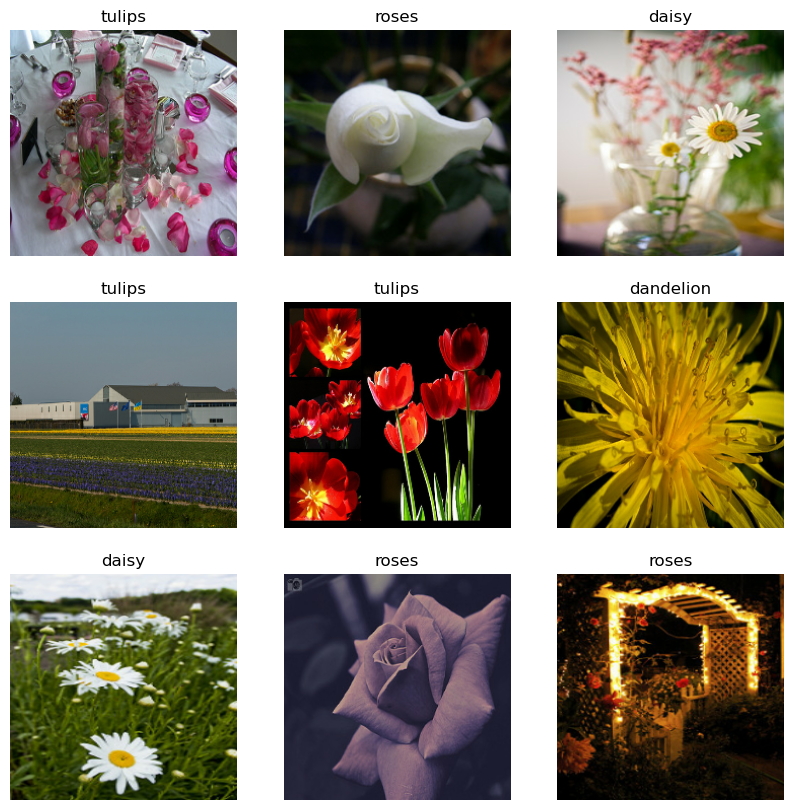

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):      # take(1) heißt hier: Nimm (zufällig) einen Batch (d.h. 32 Bilder)
    for i in range(9):                            # Daher: Aus diesen 32 Bildern die ersten 9 nehmen und darstellen. 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy()/255)         # train_dataset ist ein TF-Dataset. Für imshow daher erst in np-Array umwandeln (und auf Pixelwerte zwischen 0 und 1 normieren, statt wie aktuell in full_data zwischen 0 und 255)
        plt.title(class_names[labels[i]])         # Korrektes Label über dem Bild darstellen   
        plt.axis("off")
        
plt.show()

In [ ]:
total_batches = len(dataset)
print('Anzahl der Batches (vor dem Splitten): %d' % total_batches)

validation_dataset = dataset.take(total_batches // 5)
dataset = dataset.skip(total_batches // 5)
# Info: Die Division mittels // liefert direkt ein gerundetes Ganzzahl-Ergebnis.

print('Anzahl der Validation Batches (nach dem Splitten): %d' % len(validation_dataset))
print('Anzahl der Test Batches (nach dem Splitten): %d' % len(test_dataset))